# **Agrupamento de Perfis Socioeconômicos com o Dataset Census Income (Adult)**

### **Intrudução**

<p align="justify">
Nesse projeto, utilizei técnicas de Machine Learning e análise de dados para realizar um clustering (agrupamento não supervisionado) de perfis socioeconômicos a partir do famoso dataset do Censo dos EUA (Adult Census Income Dataset).

<p align="justify">
A ideia principal foi explorar os dados demográficos e econômicos, e depois identificar grupos de indivíduos com características semelhantes, com base em variáveis como idade, nível educacional, profissão, horas trabalhadas por semana, renda de capital, entre outras.

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set();

In [3]:
# Carregando base de dados

## url para download
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

## Colunas do dataset
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain",
    "capital_loss", "hours_per_week", "native_country", "income"
]

## Transformando dados em csv
dados = pd.read_csv(url,
                    names = columns,
                    na_values = "?",
                    skipinitialspace = True)

In [4]:
# Visualizando base de dados

dados.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Análise Exploratória dos Dados**

In [5]:
# Shape dos dados

dados.shape

(32561, 15)

In [6]:
# Informação sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Verificando a existencia de valores faltantes

dados.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [8]:
# Estatistica Descritica

dados.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Visualizações Gráficas**

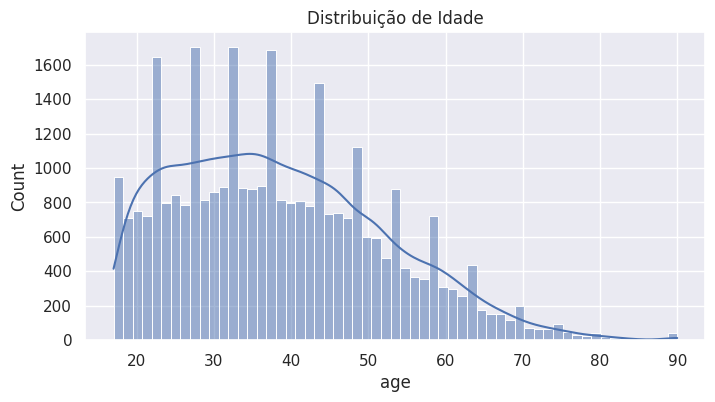

In [9]:
# Distribuição de idade

plt.figure(figsize = (8,4))

sns.histplot(dados['age'], kde = True)

plt.title("Distribuição de Idade")
plt.show();

**Observação 1**

<p align="justify">
O gráfico mostra a maioria dos indivíduos tem entre 20 e 50 anos, com um pico entre 25 e 40 anos, indicando uma população adulta ativa. A distribuição é assimétrica à direita, com poucos indivíduos abaixo de 20 ou acima de 70 anos, refletindo menor representatividade de jovens e idosos.

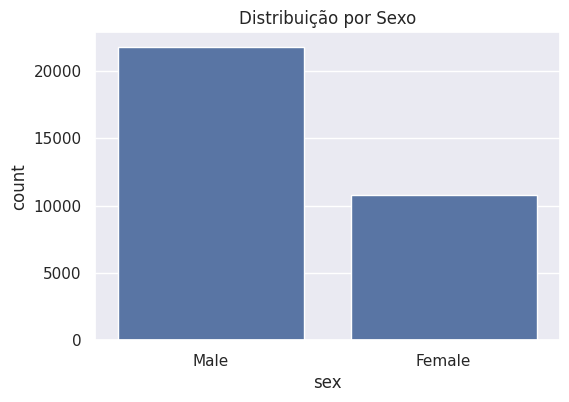

In [10]:
# Gráfico de barras para sexo

plt.figure(figsize = (6,4))

sns.countplot(data = dados,
              x = 'sex')

plt.title("Distribuição por Sexo")
plt.show();

**Observação 2**

<p align="justify">
O gráfico mostra que há cerca de 20.000 homens (Male) e 10.000 mulheres (Female), indicando que homens representam aproximadamente o dobro das mulheres na amostra, o que pode refletir um desbalanceamento de gênero e sugerir a necessidade de ajustes no modelo para evitar vieses.

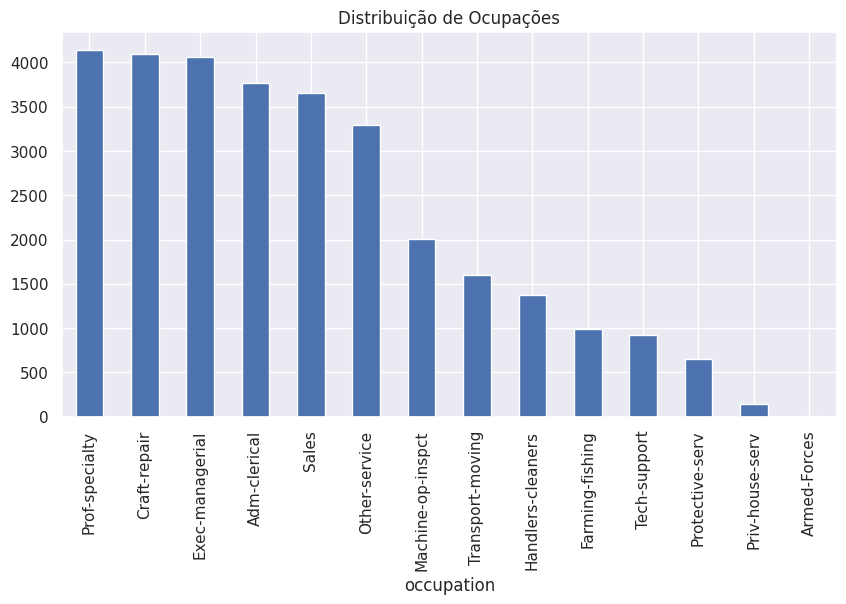

In [11]:
# Frequência de ocupações

plt.figure(figsize = (10,5))

dados['occupation'].value_counts().plot(kind = 'bar')

plt.title("Distribuição de Ocupações")
plt.show();

**Observação 3**

<p align="justify">
As ocupações mais frequentes são "Prof-specialty", "Craft-repair" e "Exec-managerial", com mais de 3.500 indivíduos cada, seguidas por "Sales" e "Adm-clerical", com cerca de 3.000. Há uma queda progressiva para ocupações como "Machine-op-inspct" e "Transport-moving", com cerca de 1.500, até categorias menos representadas como "Priv-house-serv" e "Armed-Forces", com menos de 500 indivíduos. Isso indica maior concentração em profissões qualificadas ou comuns no mercado de trabalho de 1994, sugerindo que ocupações como "Prof-specialty" e "Exec-managerial" podem estar associadas a rendas mais altas (>50K), o que deve ser investigado com cruzamentos adicionais para o modelo de machine learning.

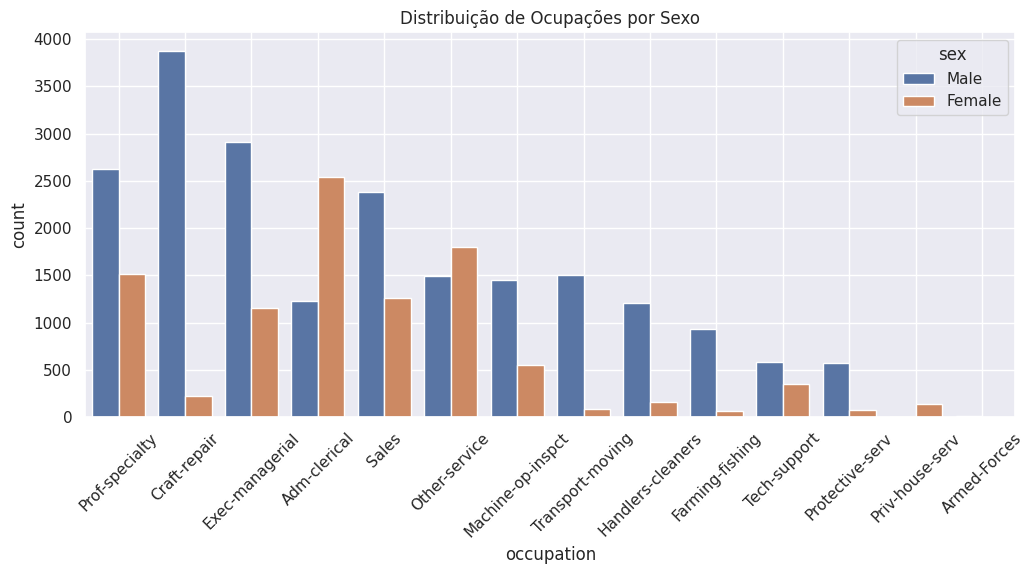

In [12]:
# Distribuição de Sexo por Ocupação

plt.figure(figsize=(12,5))

sns.countplot(data = dados,
              x = 'occupation',
              hue = 'sex',
              order = dados['occupation'].value_counts().index)

plt.title('Distribuição de Ocupações por Sexo')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**Observação 4**

<p align="justify">
O gráfico mostra a contagem de indivíduos por ocupação segmentada por gênero (Male em azul e Female em laranja). As ocupações com maior representação masculina são "Craft-repair" e "Prof-specialty", ambas com cerca de 3.500 homens, enquanto "Adm-clerical" lidera entre mulheres, com cerca de 2.500. Mulheres são majoritárias em "Adm-clerical" e "Other-service", mas têm baixa representação em "Craft-repair", "Transport-moving" e "Farming-fishing", que são dominadas por homens. Ocupações como "Priv-house-serv" e "Armed-Forces" têm poucos indivíduos de ambos os gêneros. Isso revela uma segregação ocupacional por gênero, com implicações para o modelo de machine learning: a variável sex pode influenciar a renda indiretamente via occupation, e o desbalanceamento de gênero por categoria pode introduzir vieses, sugerindo a necessidade de ajustes como estratificação ou análise de fairness.

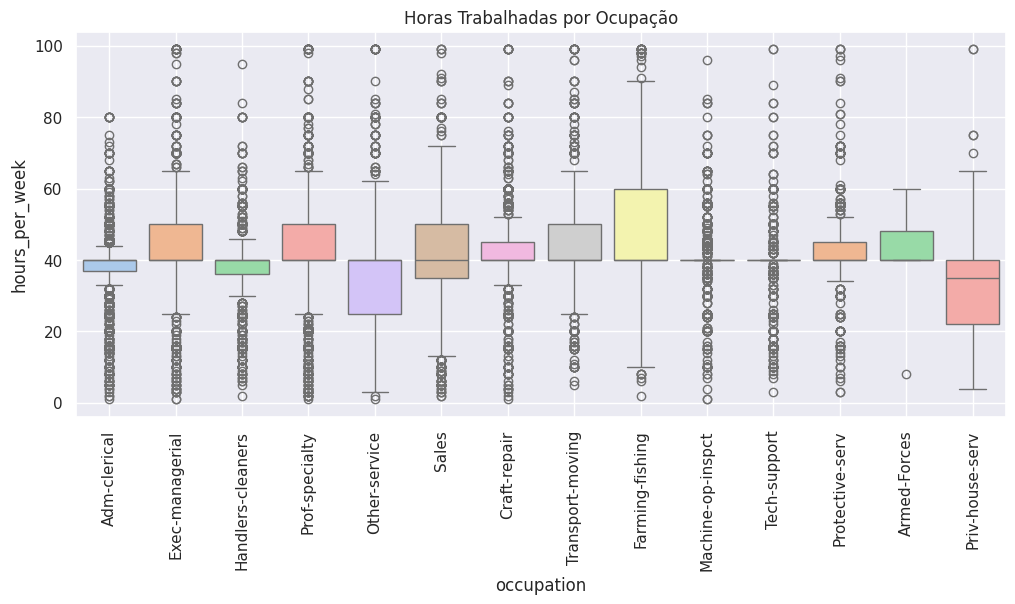

In [13]:
# Boxplot de Horas por Semana vs. Ocupação

plt.figure(figsize=(12,5))

sns.boxplot(data = dados,
            x = 'occupation',
            y = 'hours_per_week',
            palette = 'pastel')

plt.title('Horas Trabalhadas por Ocupação')
plt.xticks(rotation = 90)
plt.grid(True)

plt.show()

**Observação 5**

<p align="justify">
O gráfico exibe a distribuição de hours-per-week por categoria de ocupação usando boxplots. A maioria das ocupações tem mediana próxima de 40 horas semanais, como "Adm-clerical", "Sales" e "Prof-specialty", indicando uma jornada padrão. Ocupações como "Exec-managerial" e "Farming-fishing" apresentam medianas mais altas, cerca de 45-50 horas, e maior variabilidade, com alguns indivíduos trabalhando até 80-100 horas, sugerindo maior dedicação ou demandas específicas. "Priv-house-serv" e "Other-service" têm medianas mais baixas, cerca de 30 horas, indicando jornadas parciais. Outliers são comuns, especialmente em "Craft-repair" e "Transport-moving", com alguns trabalhando menos de 20 ou mais de 80 horas. Para o modelo de machine learning, hours-per-week pode ser uma variável preditiva importante para renda, mas a variabilidade e os outliers sugerem a necessidade de tratamento, como remoção de extremos ou transformação da variável.

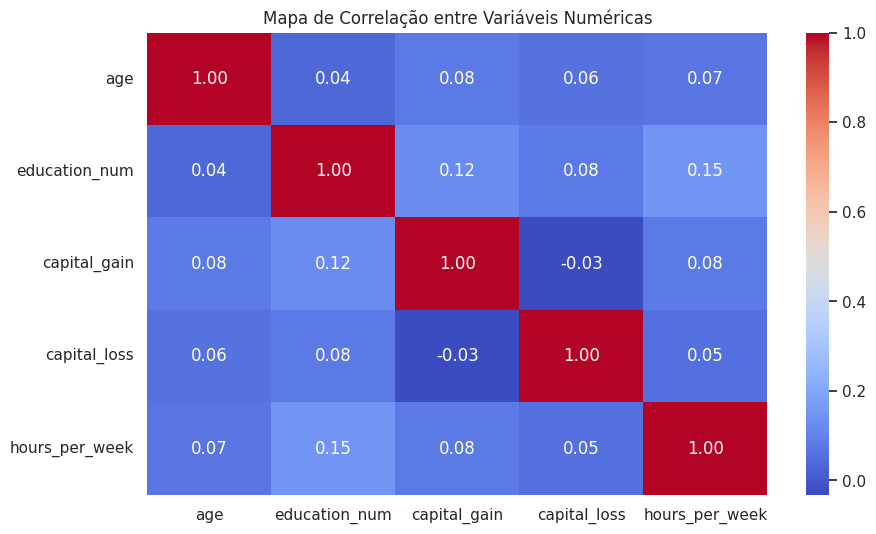

In [14]:
# Mapa de Correlação entre Variáveis Numéricas

## Definindo as colunas numéricas
num_cols = ['age', 'education_num', 'capital_gain',
            'capital_loss', 'hours_per_week']

plt.figure(figsize = (10,6))

sns.heatmap(dados[num_cols].corr(),
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f')

plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

**Observação 6**

<p align="justify">
As correlações mais notáveis são: education_num com hours_per_week (0.15), indicando que pessoas com maior nível educacional tendem a trabalhar mais horas, e education_num com capital_gain (0.12), sugerindo que educação mais alta pode estar associada a maiores ganhos de capital. Há uma correlação negativa fraca entre capital_gain e capital_loss (-0.03), o que faz sentido, pois ganhos e perdas de capital geralmente não ocorrem simultaneamente. As demais correlações são muito baixas (abaixo de 0.1), como age com education_num (0.04), indicando pouca relação linear entre as variáveis. Para o modelo de machine learning, essas correlações sugerem que education_num pode ser uma variável relevante para prever renda, mas a baixa correlação geral implica que interações não lineares ou outras variáveis (como categóricas) podem ser mais determinantes.

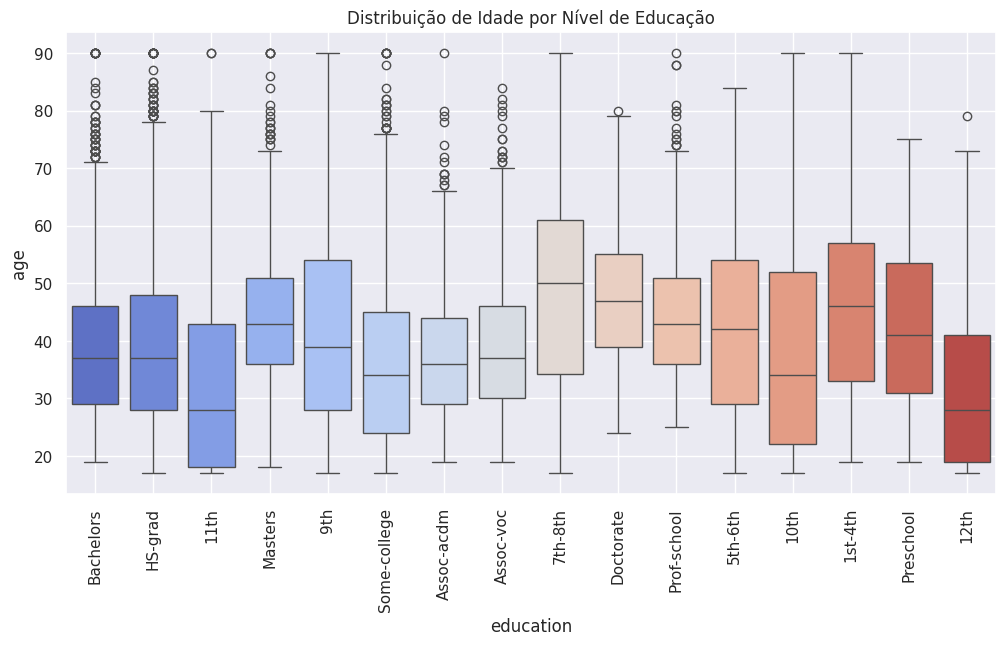

In [15]:
# Distribuição de Educação x Idade

plt.figure(figsize = (12,6))

sns.boxplot(data = dados,
            x = 'education',
            y = 'age',
            palette = 'coolwarm')

plt.title('Distribuição de Idade por Nível de Educação')
plt.xticks(rotation = 90)
plt.grid(True)

plt.show()

**Observação 7**

<p align="justify">
O gráfico exibe a relação entre age e education. Indivíduos com níveis educacionais mais altos, como "Doctorate" e "Masters", têm medianas de idade mais elevadas, em torno de 50 anos, com "Doctorate" apresentando idades até 80 anos, indicando que esses níveis requerem mais tempo para serem alcançados. Por outro lado, níveis mais baixos, como "Preschool" e "1st-4th", têm medianas de idade mais altas (acima de 40 anos), possivelmente refletindo adultos mais velhos com educação formal limitada na época do censo (1994). Níveis intermediários, como "HS-grad" e "Some-college", mostram medianas entre 30 e 40 anos, com maior dispersão, sugerindo uma faixa etária mais ampla de adultos em idade ativa. "9th" e "11th" têm medianas mais baixas, próximas de 30 anos, indicando que muitos podem ter abandonado os estudos cedo e entrado no mercado de trabalho. Para o modelo de machine learning, a interação entre age e education pode ser relevante para prever renda, mas a variabilidade dentro de cada nível educacional sugere que categorizar ou criar interações pode capturar melhor os padrões.

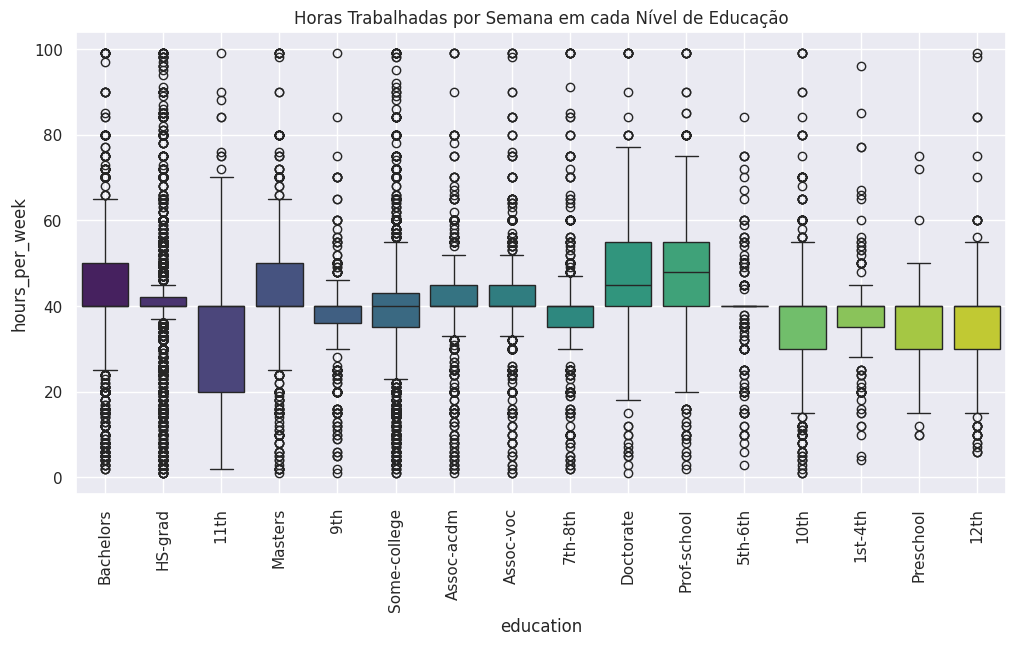

In [16]:
# Educação vs Horas Trabalhadas

plt.figure(figsize = (12,6))

sns.boxplot(data = dados,
            x = 'education',
            y = 'hours_per_week',
            palette = 'viridis')

plt.title('Horas Trabalhadas por Semana em cada Nível de Educação')
plt.xticks(rotation = 90)
plt.grid(True)

plt.show()

**Observação 8**

<p align="justify">
O gráfico mostra a distribuição de hours_per_week por categoria de education usando boxplots. A mediana para a maioria dos níveis educacionais, como "HS-grad", "Some-college" e "Bachelors", está em torno de 40 horas semanais, indicando uma jornada padrão. Níveis mais altos, como "Doctorate" e "Masters", têm medianas ligeiramente maiores, cerca de 45 horas, com maior variabilidade e outliers até 80-100 horas, sugerindo maior dedicação. Níveis mais baixos, como "Preschool" e "1st-4th", apresentam medianas menores, entre 30-35 horas, possivelmente refletindo trabalhos parciais. "Prof-school" também mostra mediana alta, próxima de 50 horas, com dispersão significativa. Outliers são comuns, especialmente em "HS-grad" e "Some-college", com alguns trabalhando menos de 20 ou mais de 80 horas. Para o modelo de machine learning, hours_per_week pode ser preditiva para renda, especialmente em níveis educacionais mais altos, mas os outliers sugerem a necessidade de tratamento, como remoção ou transformação da variável.

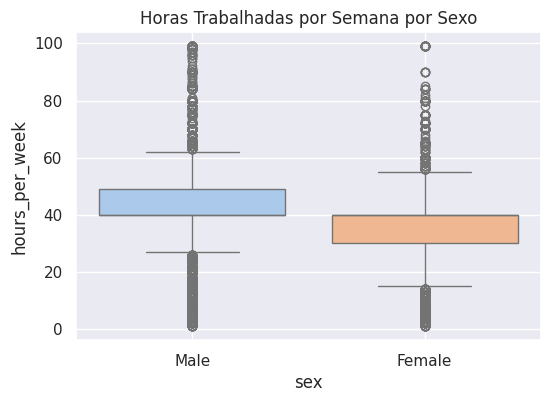

In [17]:
# Horas Trabalhadas por Sexo

plt.figure(figsize = (6, 4))

sns.boxplot(data = dados,
            x = 'sex',
            y = 'hours_per_week',
            palette = 'pastel')

plt.title('Horas Trabalhadas por Semana por Sexo')
plt.grid(True)
plt.show()

**Observação 9**

<p align="justify">
A mediana para ambos os sexos está próxima de 40 horas semanais, mas homens (Male, em azul) apresentam maior variabilidade, com o intervalo interquartil (IQR) entre 40 e 50 horas e outliers até 100 horas, enquanto mulheres (Female, em laranja) têm um IQR mais estreito, entre 35 e 40 horas, com menos outliers. Homens também têm mais indivíduos trabalhando menos de 20 horas, indicando maior diversidade nas jornadas. Essa diferença sugere que homens podem estar mais associados a ocupações com jornadas longas (como visto em gráficos anteriores, e.g., "Craft-repair"), enquanto mulheres tendem a jornadas mais regulares (e.g., "Adm-clerical").

### **Pré-Processamento de Dados**

In [18]:
# Removendo colunas menos úteis para clustering (ex: income, fnlwgt)

dados = dados.drop(columns = ['income', 'fnlwgt'])

In [19]:
# Separaando variáveis numéricas e categóricas

## Variáveis Numéricas
num_features = dados.select_dtypes(include = ['int64', 'float64']).columns.tolist()

## Variáveis Categóricas
cat_features = dados.select_dtypes(include = ['object']).columns.tolist()

In [20]:
# Pipelines de pré-processamento

## Para variáveis numéricas
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

## Para variáveis categóricas
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

## Objeto Criado
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])

In [21]:
# Aplicando pré-processamento aos dados

dados_processados = preprocessor.fit_transform(dados)

**Redução da Dimensionalidade: escolhendo número ideal**

In [22]:
# Instanciando objeto PCA
pca = PCA()

# Aplicando aos dados pré-processados
dados_pca = pca.fit_transform(dados_processados)

In [23]:
# Encontrando variância explicada acumulada

exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([0.16586221, 0.28540223, 0.39519734, 0.49532857, 0.58679629,
       0.65231286, 0.68463434, 0.71213242, 0.73507491, 0.75595501,
       0.7748216 , 0.79258111, 0.80895292, 0.82445037, 0.83670633,
       0.84861738, 0.85995591, 0.86996965, 0.87954401, 0.88865535,
       0.89741234, 0.90479641, 0.91145773, 0.91754097, 0.92300573,
       0.92812144, 0.93297912, 0.93766322, 0.94221008, 0.94619609,
       0.95014758, 0.95384245, 0.95744984, 0.96097739, 0.96431466,
       0.96756265, 0.97062711, 0.9733986 , 0.97608752, 0.97818759,
       0.98017021, 0.98202207, 0.9836547 , 0.98520754, 0.98672969,
       0.98818041, 0.98955386, 0.99057249, 0.99150611, 0.99215764,
       0.99270538, 0.9932163 , 0.99364981, 0.99403271, 0.99439569,
       0.99474964, 0.99507735, 0.99538643, 0.99568815, 0.99596482,
       0.99621894, 0.99646796, 0.99670033, 0.99692965, 0.99714607,
       0.99735233, 0.99755501, 0.99775396, 0.99794809, 0.99813104,
       0.99829072, 0.99843175, 0.99856989, 0.9986914 , 0.99880

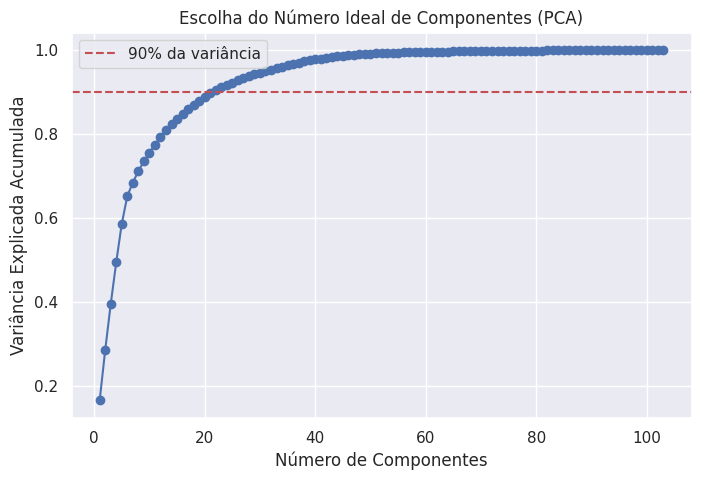

In [24]:
# Visualizando Número de Componentes Ideal

plt.figure(figsize = (8,5))

plt.plot(range(1, len(cum_exp_var) + 1), cum_exp_var, marker = 'o')

plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Escolha do Número Ideal de Componentes (PCA)")

plt.grid(True)
plt.axhline(y = 0.90, color = 'r', linestyle = '--', label = '90% da variância')
plt.legend()

plt.show()

In [25]:
# Quantos componentes precisamos para 90% da variância?

n_components_90 = np.argmax(cum_exp_var >= 0.90) + 1
print(f"Número ideal de componentes para explicar 90% da variância: {n_components_90}")

Número ideal de componentes para explicar 90% da variância: 22


In [26]:
# Aplicaando PCA com número ótimo de componentes

## Instanciando objeto
pca_final = PCA(n_components = n_components_90)

## Aplicando aos dados
dados_pca_final = pca_final.fit_transform(dados_processados)

### **Clustering com KMeans**

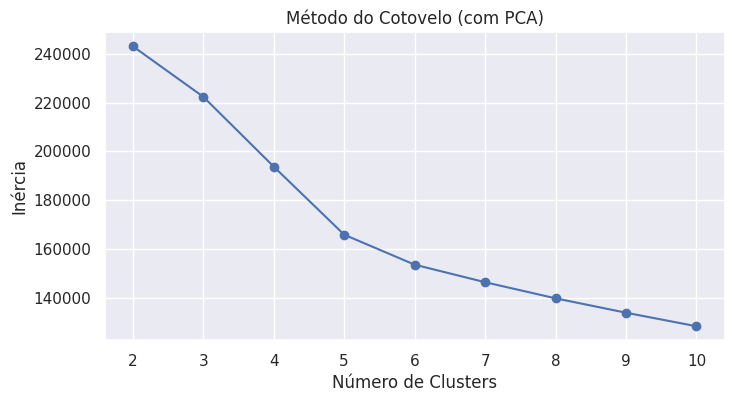

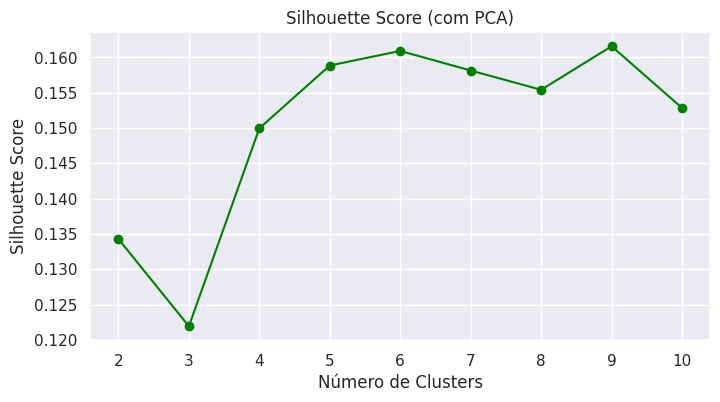

In [27]:
# Encontrando o número ideal de clusters (método do cotovelo)

inertia = []
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(dados_pca_final)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(dados_pca_final, kmeans.labels_))

# Método do cotovelo
plt.figure(figsize = (8,4))
plt.plot(range(2,11), inertia, marker = 'o')
plt.title("Método do Cotovelo (com PCA)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()

# Silhouette Score
plt.figure(figsize = (8,4))
plt.plot(range(2,11), silhouettes, marker = 'o', color = 'green')
plt.title("Silhouette Score (com PCA)")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

**Observação 10**

<p align="justify">
O gráfico "Método do Cotovelo (com PCA)" mostra a inércia (soma dos quadrados das distâncias intra-cluster) em função do número de clusters para um modelo de clustering (provavelmente K-Means) aplicado ao dataset Adult após redução de dimensionalidade com PCA. A inércia começa alta, em cerca de 24.000 com 2 clusters, e diminui progressivamente à medida que o número de clusters aumenta, chegando a cerca de 14.000 com 10 clusters. A curva apresenta uma queda mais acentuada entre 2 e 4 clusters, com um "cotovelo" sutil em torno de 4 clusters, onde a redução na inércia começa a se estabilizar. Isso sugere que 4 clusters podem ser um número ideal para capturar a estrutura dos dados sem superajustar.

**Observação 11**

<p align="justify">
O gráfico "Silhouette Score (com PCA)" apresenta o índice de Silhouette para diferentes números de clusters (de 2 a 10) no dataset Adult após redução de dimensionalidade com PCA. O score começa baixo, em 0.125 com 2 clusters, aumenta para 0.150 com 4 clusters, atinge um pico de 0.160 com 5 clusters, e depois varia, com outro pico de 0.155 em 8 clusters, antes de cair para 0.150 com 10 clusters. O valor mais alto em 5 clusters indica que essa configuração maximiza a coesão intra-cluster e a separação entre clusters, sugerindo que 5 é o número ideal de clusters. Comparado ao gráfico anterior (método do cotovelo, que apontou 4 clusters), 5 clusters parecem mais apropriados com base no Silhouette.

In [28]:
# Escolha final do número de clusters

## Número Ideal
n_clusters = 5

## Instanciando KMeans
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)

## Aplicando aos dados
dados['cluster'] = kmeans.fit_predict(dados_pca_final)

### **Análise dos Clusters**

In [29]:
print("\nDistribuição de indivíduos por cluster:\n\n", dados['cluster'].value_counts())


Distribuição de indivíduos por cluster:

 cluster
1    12536
2    10287
0     8096
3     1483
4      159
Name: count, dtype: int64


**Resultado 1**

Há uma distribuição desigual entre os clusters, o que é esperado em aprendizado não supervisionado, especialmente em dados socioeconômicos, onde certos perfis podem ser mais comuns. O Cluster 4 é bem pequeno, sugerindo que ele pode representar um grupo muito específico ou outlier.

In [30]:
# Agrupar por cluster para ver perfis médios

cluster_profiles = dados.groupby('cluster')[num_features].mean()
print("\nPerfil médio por cluster (variáveis numéricas):\n\n", cluster_profiles)


Perfil médio por cluster (variáveis numéricas):

                age  education_num  capital_gain  capital_loss  hours_per_week
cluster                                                                      
0        41.286808      13.218503   1361.079792      0.656868       44.395380
1        46.274729       8.611918    536.607371      0.736040       42.356733
2        26.516672       9.226305    140.300476      0.679984       34.417712
3        41.639245      10.988537      0.000000   1902.333109       43.359407
4        46.358491      12.918239  99999.000000      0.000000       49.798742


**Resultado 2**

* **Cluster 0:** parece ser um grupo de profissionais de nível superior, com boa educação (Bachelors/Masters) e que trabalham mais horas, possivelmente em cargos qualificados.

* **Cluster 1:** representa pessoas mais velhas, com menor nível educacional (ensino médio ou menos) e trabalho mais manual ou operacional.

* **Cluster 2:** é o grupo dos jovens, com educação média e menos horas de trabalho, possivelmente em início de carreira ou empregos menos estáveis.

* **Cluster 3:** destaca-se pela alta perda de capital, sugerindo um grupo que enfrentou reveses financeiros, apesar de ter um nível educacional razoável.

* **Cluster 4:** é um grupo pequeno e distinto, com altíssimo ganho de capital ($99.999) e alta dedicação ao trabalho (quase 50 horas/semana). Provavelmente são indivíduos de alta renda, como investidores ou profissionais de elite.

In [31]:
# Proporções de categorias por cluster
for col in ['education', 'occupation', 'sex']:
    print(f"\nDistribuição de {col} por cluster:\n")
    print(dados.groupby('cluster')[col].value_counts(normalize = True).unstack().round(2))


Distribuição de education por cluster:

education  10th  11th  12th  1st-4th  5th-6th  7th-8th   9th  Assoc-acdm  \
cluster                                                                    
0           NaN   NaN   NaN      NaN      NaN      NaN   NaN        0.09   
1          0.04  0.04  0.01     0.01     0.02     0.04  0.03        0.00   
2          0.04  0.06  0.03     0.00     0.01     0.01  0.02        0.03   
3          0.02  0.02  0.01     0.00     0.01     0.01  0.01        0.04   
4          0.01   NaN   NaN      NaN      NaN      NaN  0.01        0.01   

education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
cluster                                                                   
0               0.06       0.56       0.04      NaN     0.19        NaN   
1               0.03        NaN        NaN     0.51      NaN        0.0   
2               0.04       0.04        NaN     0.36     0.00        0.0   
3               0.04       0.22       0.04     0.26

**Resultado 3**

**Distribuição de Educação por Cluster**

Aqui, os valores representam proporções de indivíduos em cada nível educacional por cluster:

**Cluster 0:** Alta concentração em Bachelors (56%) e Masters (19%), com presença de Doctorate (4%) e Prof-school (6%). Não há pessoas com ensino médio (HS-grad) ou menos.

* **Insight:** Este é o grupo mais educado, com foco em ensino superior e profissões especializadas.

**Cluster 1:** Maioria em HS-grad (51%) e Some-college (27%), com presença de níveis mais baixos (ex.: 10th, 11th, 7th-8th).

* **Insight:** Educação mais básica, típica de trabalhadores manuais ou de nível operacional.

**Cluster 2:** Predominância de HS-grad (36%) e Some-college (35%), com pequena presença de Bachelors (4%).

* **Insight:** Jovens com educação média, possivelmente ainda em formação ou em empregos de entrada.

**Cluster 3:** Educação mais diversa: HS-grad (26%), Bachelors (22%), Some-college (19%), e Masters (10%).

* **Insight:** Educação intermediária, com uma mistura de níveis, o que pode refletir diversidade ocupacional.

**Cluster 4:** Alta proporção de Prof-school (29%), Bachelors (26%), e Masters (11%), com menor presença de HS-grad (14%).

* **Insight:** Educação avançada, compatível com o alto ganho de capital e profissões de elite.

**Resumo:** A educação é um fator distintivo entre os clusters. Cluster 0 e 4 têm os níveis mais altos, enquanto Cluster 1 e 2 têm educação mais básica. Cluster 3 é um grupo intermediário em termos educacionais.

**Distribuição de Ocupação por Cluster**

Analisamos as proporções de ocupações para entender os perfis profissionais:

**Cluster 0:** Alta concentração em Prof-specialty (37%) e Exec-managerial (24%), com Sales (12%) e Adm-clerical (7%).

* **Insight:** Profissões especializadas (médicos, advogados, professores) e cargos gerenciais, compatível com a alta educação.

**Cluster 1:** Predominância de Craft-repair (23%), Machine-op-inspct (10%), Sales (10%), e Adm-clerical (10%).

* **Insight:** Trabalhos manuais (reparos, operação de máquinas) e administrativos, típicos de um grupo com menor educação.

**Cluster 2:** Alta proporção de Other-service (21%), Adm-clerical (20%), Sales (13%), e Handlers-cleaners (8%).

* **Insight:** Jovens em serviços gerais, cargos administrativos de entrada e vendas, refletindo o início de carreira.

**Cluster 3:** Mistura de Prof-specialty (20%), Exec-managerial (20%), Craft-repair (14%), e Sales (13%).

* **Insight:** Diversidade ocupacional, mas com ênfase em profissões qualificadas e gerenciais, apesar das perdas financeiras.

**Cluster 4:** Predominância de Prof-specialty (43%), Exec-managerial (27%), e Sales (16%).

* **Insight:** Profissões de alto nível, compatíveis com o alto ganho de capital e educação avançada.

**Resumo:** Cluster 0 e 4 concentram profissões especializadas e gerenciais, Cluster 1 foca em trabalhos manuais, Cluster 2 em serviços e cargos de entrada, e Cluster 3 tem uma mistura de ocupações, mas com perdas financeiras.

**Distribuição de Sexo por Cluster**

* **Cluster 0:** 73% homens, 27% mulheres.
* **Cluster 1:** 79% homens, 21% mulheres.
* **Cluster 2:** 46% homens, 54% mulheres.
* **Cluster 3:** 77% homens, 23% mulheres.
* **Cluster 4:** 86% homens, 14% mulheres.

**Insights:**

**Cluster 2** é o único com predominância feminina (54%), o que pode estar ligado às ocupações de serviços (Other-service, Adm-clerical), que historicamente atraem mais mulheres.

**Cluster 4** tem a maior proporção de homens (86%), possivelmente refletindo a predominância masculina em profissões de elite ou de alta renda no dataset (ex.: executivos, profissionais especializados).

Os outros clusters (0, 1, 3) têm uma maioria masculina, o que pode refletir o viés do dataset ou as ocupações dominantes (ex.: Craft-repair no Cluster 1).

### **Discussão Geral**

Os 5 clusters identificados revelam padrões socioeconômicos distintos no dataset Adult, que podem ser úteis diversas aplicações, como por exemplo, em políticas públicas, marketing ou estudos demográficos:

**Cluster 0 (Profissionais Qualificados):** Pessoas de meia-idade, altamente educadas (graduação ou pós-graduação), em profissões especializadas ou gerenciais, com dedicação ao trabalho (44 horas/semana) e algum ganho de capital. Representam uma classe média-alta ou alta, com estabilidade financeira.

* **Exemplo de Aplicação:** Políticas de incentivo à educação continuada ou programas para profissionais qualificados (ex.: benefícios fiscais para professores ou médicos).

**Cluster 1 (Trabalhadores Manuais):** Pessoas mais velhas, com educação mais baixa (ensino médio ou menos), em ocupações manuais ou operacionais, trabalhando cerca de 42 horas/semana. Ganho de capital baixo.

* **Exemplo de Aplicação:** Programas de requalificação profissional ou aposentadoria, considerando a idade avançada e o tipo de trabalho físico.

**Cluster 2 (Jovens em Início de Carreira):** Jovens (26 anos em média), com educação média (ensino médio ou um pouco mais), em ocupações de serviços ou administrativas, trabalhando menos horas (34 horas/semana). Predominância feminina.

* **Exemplo de Aplicação:** Políticas de inserção no mercado de trabalho, como programas de estágio ou treinamento para jovens, especialmente mulheres.

**Cluster 3 (Grupo com Perdas Financeiras):** Pessoas de meia-idade, com educação intermediária, em ocupações diversas, mas marcadas por alta perda de capital ($1.902). Trabalham 43 horas/semana.

* **Exemplo de Aplicação:** Estudos demográficos sobre vulnerabilidade financeira ou programas de apoio a grupos que sofreram perdas (ex.: subsídios ou renegociação de dívidas).

**Cluster 4 (Elite Financeira):** Pequeno grupo de pessoas mais velhas, altamente educadas, em profissões especializadas ou gerenciais, com altíssimo ganho de capital ($99.999) e dedicação intensa ao trabalho (50 horas/semana). Predominância masculina.

* **Exemplo de Aplicação:** Estratégias de marketing de luxo ou políticas fiscais para alta renda (ex.: impostos progressivos).

### **Considerações Finais**

Este projeto ilustrou de forma eficaz o potencial do aprendizado não supervisionado para revelar padrões ocultos em dados socioeconômicos, utilizando o dataset Adult como base. A segmentação da população em cinco clusters distintos destacou a diversidade de perfis dentro dos dados, com grupos variando desde jovens em início de carreira até indivíduos de alta renda e profissionais qualificados. Essa abordagem demonstra como técnicas de clusterização podem transformar dados brutos em insights significativos, permitindo uma compreensão mais profunda das estruturas subjacentes em conjuntos de dados complexos.

Os resultados obtidos, como a identificação de grupos com diferentes níveis educacionais, ocupações e características financeiras, reforçam a capacidade do aprendizado não supervisionado de capturar heterogeneidade em dados sem a necessidade de rótulos prévios. A análise dos gráficos de Silhouette Score e Método do Cotovelo foi fundamental para determinar o número ideal de clusters (5), garantindo que a segmentação fosse robusta e significativa.

**Limitações**

Apesar dos insights gerados, o projeto apresenta algumas limitações. O dataset Adult, por ser de 1994, reflete um contexto socioeconômico que pode não ser totalmente representativo da realidade atual, especialmente em termos de distribuição de ocupações e renda. Além disso, a presença de valores ausentes e o desbalanceamento natural de certas variáveis (como gênero e renda) podem ter influenciado os resultados da clusterização.

**Próximos Passos**

Para aprofundar a análise, seria interessante explorar outras técnicas de clusterização, como DBSCAN ou modelos hierárquicos, para verificar se padrões diferentes emergem. Além disso, aplicar métodos de visualização mais avançados, como t-SNE ou UMAP, poderia ajudar a entender melhor a separação dos clusters no espaço de dados. Pode-se testar a robustez dos clusters com validação cruzada ou comparar os resultados com outras abordagens, como aprendizado supervisionado, pode fornecer uma visão mais completa da estrutura dos dados.

Em resumo, este trabalho destaca o valor do aprendizado não supervisionado como uma ferramenta exploratória para análise de dados socioeconômicos, abrindo portas para futuras investigações e refinamentos. A capacidade de identificar grupos distintos sem rótulos prévios é um passo importante para compreender a complexidade de populações e pode servir como base para estudos mais amplos e detalhados no futuro.